In [1]:
import os

os.chdir("../../")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [3]:
from src.metrics import get_feature_importance, plot_confusion_matrix, plot_roc_curve
from src.preprocess import apply_ordinal_mapping, one_hot_encode

In [4]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

In [5]:
# Import models
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

In [6]:
DATA_PATH = os.path.join(os.getcwd(), "data", "heart.csv")

In [7]:
TARGET_COL = "HeartDisease"

# Load and preprocess the data

In [8]:
df = pd.read_csv(DATA_PATH)

In [9]:
df = one_hot_encode(data=df, colname="Sex", drop_first=True)

In [10]:
df = one_hot_encode(data=df, colname="ChestPainType", drop_first=False)

In [11]:
df = one_hot_encode(data=df, colname="RestingECG", drop_first=True)

In [12]:
df = apply_ordinal_mapping(data=df, colname="ExerciseAngina", mapping={"N": 0, "Y": 1})

In [13]:
df = apply_ordinal_mapping(
    data=df, colname="ST_Slope", mapping={"Down": -1, "Flat": 0, "Up": 1}
)

# Train model

In [14]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)

In [15]:
df = df.reset_index(drop=True)

In [16]:
X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]

In [17]:
param_grid = {
    "n_estimators": [1000],
    "random_state": [42],
}

In [18]:
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring="f1",
)

In [19]:
grid_model.fit(X, y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=42),
             param_grid={'n_estimators': [1000], 'random_state': [42]},
             scoring='f1')

In [21]:
grid_model.best_score_

0.873864610802349

In [23]:
model = grid_model.best_estimator_

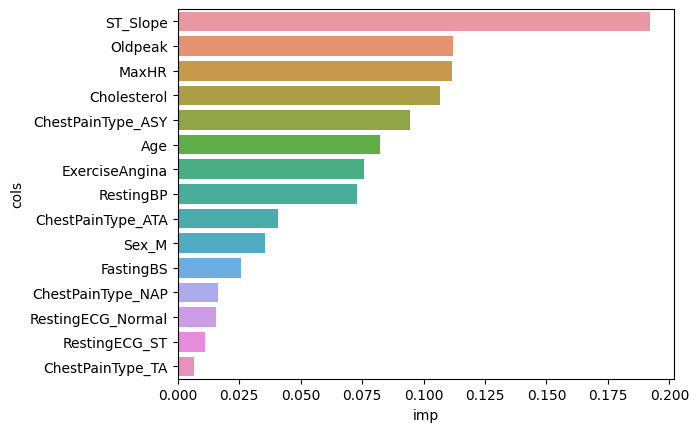

In [24]:
sns.barplot(
    data=get_feature_importance(model, df.columns.drop(TARGET_COL)), x="imp", y="cols"
)
plt.show()

# Plot metrics

- ROC/AUC curve
- Confusion matrix
- Accuracy / F1-score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=101
)

In [26]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)

In [27]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        79
           1       0.88      0.88      0.88       105

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



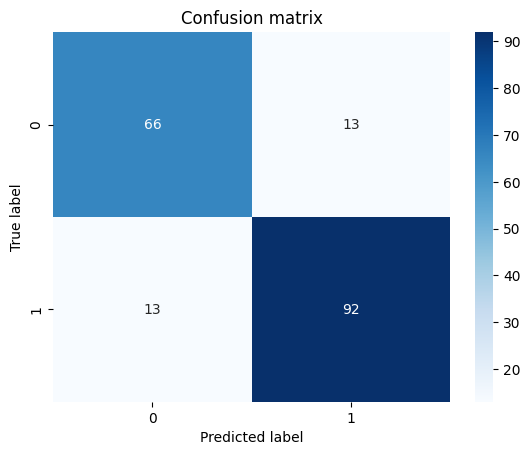

In [31]:
plot_confusion_matrix(y_test, y_pred)

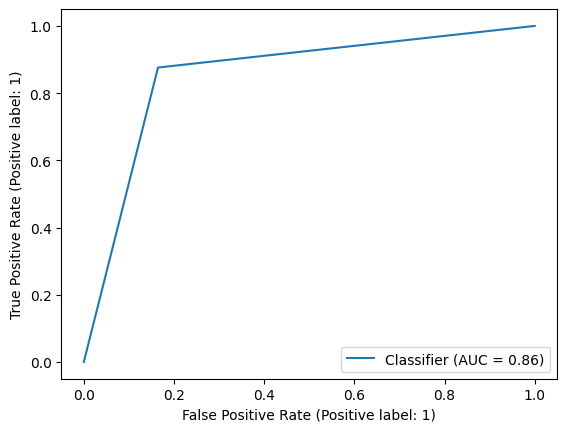

In [32]:
plot_roc_curve(y_test, y_pred)
plt.show()

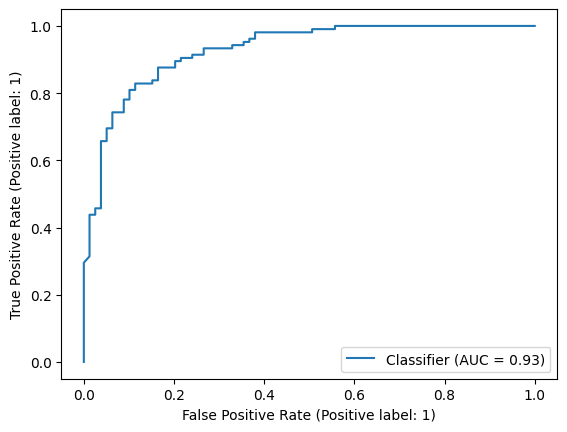

In [34]:
plot_roc_curve(y_test, y_pred_proba)

---